In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("E:/DATA SCIENCE/ML Projects(Company and Hobby)/2.Diabetic Prediction/Diabetes.csv")
df

,No.of_times_pregnant,glucose_conc,blood_pressure,skin_fold_thickness,2-Hour_serum_insulin,BMI,Diabetes_pedigree_fn,Age,Is_Diabetic
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,NO
764,2,122,70,27,0,36.8,0.340,27,NO
765,5,121,72,23,112,26.2,0.245,30,NO
766,1,126,60,0,0,30.1,0.349,47,YES


In [4]:
df.describe()

,No.of_times_pregnant,glucose_conc,blood_pressure,skin_fold_thickness,2-Hour_serum_insulin,BMI,Diabetes_pedigree_fn,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [5]:
df.isnull().sum()

 No.of_times_pregnant    0
glucose_conc             0
blood_pressure           0
skin_fold_thickness      0
2-Hour_serum_insulin     0
BMI                      0
Diabetes_pedigree_fn     0
Age                      0
Is_Diabetic              0
dtype: int64

In [6]:
df['Is_Diabetic']=df['Is_Diabetic'].map({"YES":1,"NO":0})
df

,No.of_times_pregnant,glucose_conc,blood_pressure,skin_fold_thickness,2-Hour_serum_insulin,BMI,Diabetes_pedigree_fn,Age,Is_Diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df['Is_Diabetic'].value_counts()

0    500
1    268
Name: Is_Diabetic, dtype: int64

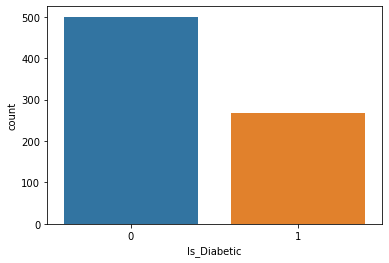

In [8]:
sns.countplot(df["Is_Diabetic"])
plt.show()

<AxesSubplot:>

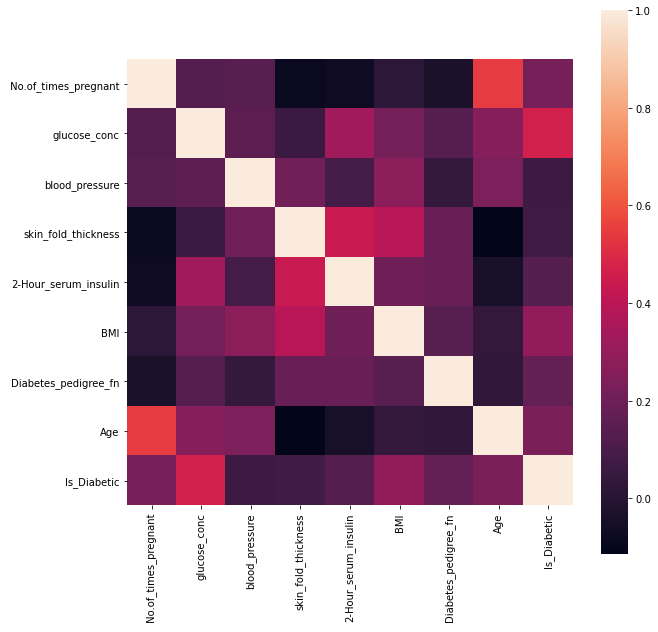

In [9]:
plt.figure(figsize=(10,10))
corr=df.corr()
sns.heatmap(corr,square=True)


In [10]:
corr

,No.of_times_pregnant,glucose_conc,blood_pressure,skin_fold_thickness,2-Hour_serum_insulin,BMI,Diabetes_pedigree_fn,Age,Is_Diabetic
No.of_times_pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
blood_pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin_fold_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
2-Hour_serum_insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Diabetes_pedigree_fn,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Is_Diabetic,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [11]:
prediction_var=["glucose_conc","blood_pressure","skin_fold_thickness","2-Hour_serum_insulin","BMI","Diabetes_pedigree_fn","Age"]
prediction_var

['glucose_conc',
 'blood_pressure',
 'skin_fold_thickness',
 '2-Hour_serum_insulin',
 'BMI',
 'Diabetes_pedigree_fn',
 'Age']

In [12]:
df.columns

Index([' No.of_times_pregnant', 'glucose_conc', 'blood_pressure',
       'skin_fold_thickness', '2-Hour_serum_insulin', 'BMI',
       'Diabetes_pedigree_fn', 'Age', 'Is_Diabetic'],
      dtype='object')

In [13]:
X=df[prediction_var]
y=df.Is_Diabetic
X

,glucose_conc,blood_pressure,skin_fold_thickness,2-Hour_serum_insulin,BMI,Diabetes_pedigree_fn,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [14]:
from sklearn.metrics import accuracy_score
import pickle
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)



In [15]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
temp=lr.predict(X_test)
print("Accuracy Score on testing data set",accuracy_score(temp,y_test))
print("Accuracy Score on training data set",lr.score(X_train,y_train)) 


Accuracy Score on testing data set 0.7575757575757576
Accuracy Score on training data set 0.7932960893854749


In [16]:
filename="E:\\Edureka\\Other ML Projects  And General Reading Materials for DS\\Diabetic Prediction\\diabetictest.sav"
pickle.dump(lr,open(filename,"wb"))

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Edureka\\Other ML Projects  And General Reading Materials for DS\\Diabetic Prediction\\diabetictest.sav'

In [17]:
lr=pickle.load(open("E:\\Edureka\\Other ML Projects  And General Reading Materials for DS\\Diabetic Prediction\\diabetictest.sav","rb"))
print("The Predicted Output from Logistic Model is: ")
print(lr.predict([[187,76,27,207,43.6,1.034,53]]))

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Edureka\\Other ML Projects  And General Reading Materials for DS\\Diabetic Prediction\\diabetictest.sav'

In [18]:
#DecisionTree
dt=DecisionTreeClassifier().fit(X_train,y_train)
temp=dt.predict(X_test)
print("Accuracy Score on testing data set",accuracy_score(temp,y_test))
print("Accuracy Score on training data set",dt.score(X_train,y_train))


Accuracy Score on testing data set 0.6406926406926406
Accuracy Score on training data set 1.0


In [19]:
#RandomForest
#from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier().fit(X_train,y_train)
temp=rf.predict(X_test)
print("Accuracy Score on testing data set",accuracy_score(temp,y_test))
print("Accuracy Score on training data set",rf.score(X_train,y_train))

Accuracy Score on testing data set 0.7272727272727273
Accuracy Score on training data set 1.0


In [20]:

#KNN
from sklearn.neighbors import KNeighborsClassifier
kn= KNeighborsClassifier().fit(X_train,y_train)
temp=kn.predict(X_test)
print("Accuracy Score on testing data set",accuracy_score(temp,y_test))
print("Accuracy Score on training data set",kn.score(X_train,y_train))


Accuracy Score on testing data set 0.7229437229437229
Accuracy Score on training data set 0.7970204841713222


In [21]:

#LinearDiscriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda= LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print("Accuracy Score on testing data set",accuracy_score(temp,y_test))
print("Accuracy Score on training data set",lda.score(X_train,y_train))


Accuracy Score on testing data set 0.7229437229437229
Accuracy Score on training data set 0.7951582867783985


In [22]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB().fit(X_train,y_train)
temp=gnb.predict(X_test)
print("Accuracy Score on testing data set",accuracy_score(temp,y_test))
print("Accuracy Score on training data set",lda.score(X_train,y_train))


Accuracy Score on testing data set 0.7142857142857143
Accuracy Score on training data set 0.7951582867783985


In [23]:
#Suport Vector Machine
from sklearn.svm import SVC
svm=SVC().fit(X_train,y_train)
temp=svm.predict(X_test)
print("Accuracy Score on testing data set",accuracy_score(temp,y_test))
print("Accuracy Score on training data set",svm.score(X_train,y_train))


Accuracy Score on testing data set 0.7532467532467533
Accuracy Score on training data set 0.7783985102420856


In [24]:
df1=pd.DataFrame({"Actual Data:":y_test,"Predicted Data:":temp})
df1

,Actual Data:,Predicted Data:
173,0,0
253,0,0
207,1,1
737,0,0
191,0,0
...,...,...
259,1,1
512,0,0
111,1,1
548,0,1


In [25]:
print(confusion_matrix(y_test, temp))

NameError: name 'confusion_matrix' is not defined

In [26]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [27]:
print(scores)

[0.79220779 0.77922078 0.79220779 0.74025974 0.84415584 0.7012987
 0.79220779 0.75324675 0.71052632 0.77631579]


In [28]:
model.fit(X,y)

LogisticRegression()

In [29]:
y_pred = cross_val_predict(model, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)

NameError: name 'confusion_matrix' is not defined

In [ ]:
conf_mat 

In [ ]:
print(metrics.accuracy_score(y,y_pred)) # to check the accuracy

In [ ]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
fpr,tpr,thresholds=roc_curve(y,y_pred)
roc_auc=auc(fpr,tpr)
print(thresholds)
print(fpr)
print(tpr)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
lr=pickle.load(open("E:\\Edureka\\Other ML Projects  And General Reading Materials for DS\\Diabetic Prediction\\diabetictest.sav"))
print("The Predicted Output from Logistic Model is: ")
print(lr.predict([[95,85,25,36,37.4,0.247,24]]))